In [4]:
import librosa
import librosa.display

# Compute Local onset autocorrelation
y, sr = librosa.load('C:/nmb/nmb_data/testvoice_F2.wav')
hop_length = 512
print(y)
print(len(y))   # 110250
print(y.shape)  # (110250,)

oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
print(oenv.shape) # (216,)

tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
print(tempogram.shape) # (193, 217)

# Compute the auto-correlation tempogram, unnormalized to make comparison easier
ac_tempgram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length, norm=None)
print(ac_tempgram.shape) # (384, 216)

[-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
110250
(110250,)
(216,)
(193, 217)
(384, 216)
C:\Users\ai\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=216
  warnings.warn(


C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


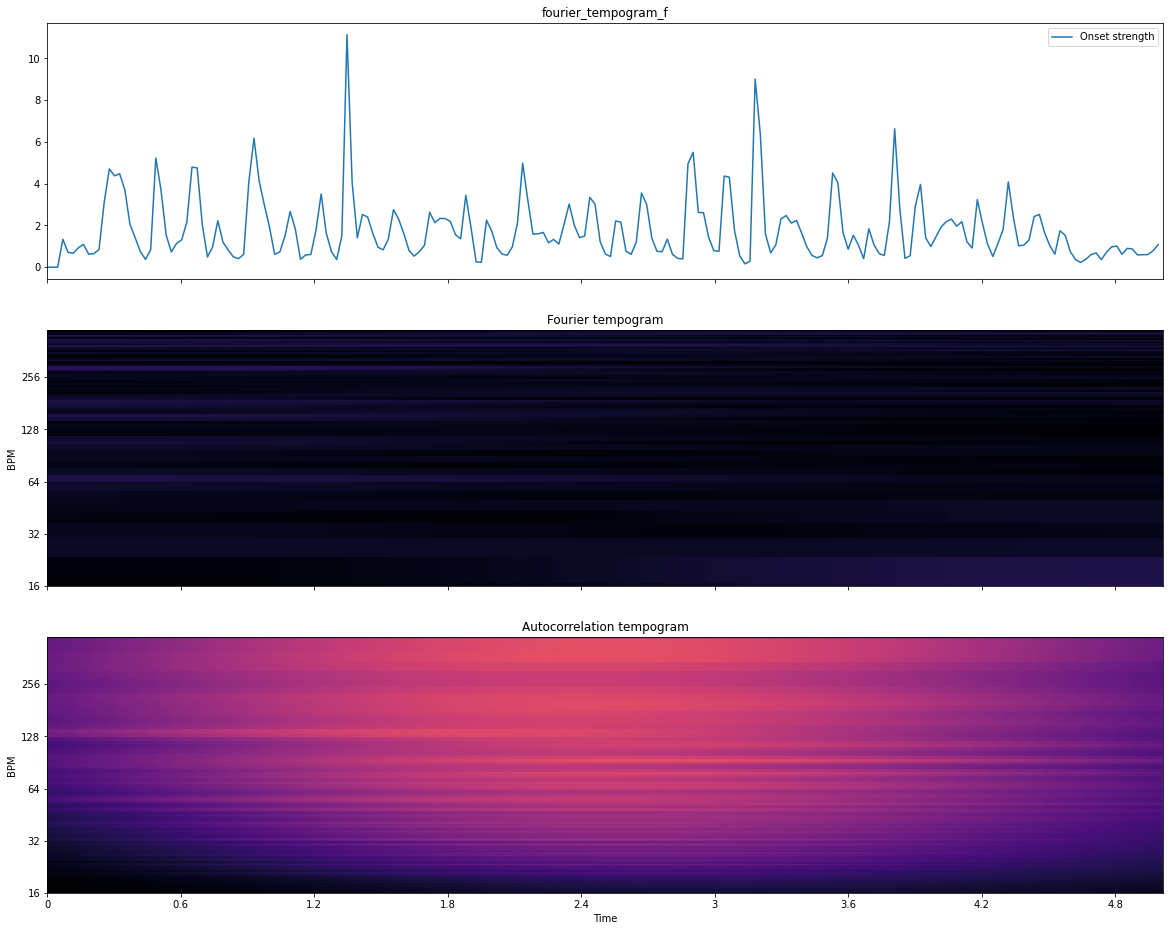

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(20, 16))
ax[0].set(title='fourier_tempogram_f')
ax[0].plot(librosa.times_like(oenv), oenv, label='Onset strength')
ax[0].legend(loc='upper right')
ax[0].label_outer()

librosa.display.specshow(np.abs(tempogram), sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='fourier_tempo', cmap='magma',
                         ax=ax[1])
ax[1].set(title='Fourier tempogram')
ax[1].label_outer()

librosa.display.specshow(ac_tempgram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[2])
ax[2].set(title='Autocorrelation tempogram')
ax[2].label_outer()                         